In [11]:
import torch
from configs import *
from vae import LinearVAE, DeepVAE
from ppca import PPCA
from data_loader import DataSampler
import random
import numpy as np


def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

setup_seed(0)


data_sampler = DataSampler(configs)
data = data_sampler.sample_tensor(1000)


ppca = PPCA(configs)
avg_log_lik = ppca.fit(data.cpu().numpy())
print(avg_log_lik)

vae = LinearVAE(configs)
optim = torch.optim.Adam(vae.parameters(), lr=configs.alg_configs.learning_rate)


elbo = []
for i in range(100000):
    loss = vae.forward(data)
    optim.zero_grad()
    loss.backward()
    optim.step()
    elbo.append(-loss.item())
    if i % 500 == 0:
        print('epoch: {}, init log px: {}, train elbo: {}'.format(i, avg_log_lik, -loss.item()))

947.5180366607916
epoch: 0, init log px: 947.5180366607916, train elbo: -2405.873291015625
epoch: 500, init log px: 947.5180366607916, train elbo: -776.369140625
epoch: 1000, init log px: 947.5180366607916, train elbo: -630.4660034179688
epoch: 1500, init log px: 947.5180366607916, train elbo: -516.3265380859375
epoch: 2000, init log px: 947.5180366607916, train elbo: -412.8326721191406
epoch: 2500, init log px: 947.5180366607916, train elbo: -316.29498291015625
epoch: 3000, init log px: 947.5180366607916, train elbo: -224.99468994140625
epoch: 3500, init log px: 947.5180366607916, train elbo: -137.44577026367188
epoch: 4000, init log px: 947.5180366607916, train elbo: -52.877357482910156
epoch: 4500, init log px: 947.5180366607916, train elbo: 29.105239868164062
epoch: 5000, init log px: 947.5180366607916, train elbo: 108.70964813232422
epoch: 5500, init log px: 947.5180366607916, train elbo: 185.8158416748047
epoch: 6000, init log px: 947.5180366607916, train elbo: 260.1192321777344


epoch: 54500, init log px: 947.5180366607916, train elbo: 947.8714599609375
epoch: 55000, init log px: 947.5180366607916, train elbo: 947.8682250976562
epoch: 55500, init log px: 947.5180366607916, train elbo: 947.8682861328125
epoch: 56000, init log px: 947.5180366607916, train elbo: 947.8704833984375
epoch: 56500, init log px: 947.5180366607916, train elbo: 947.8702392578125
epoch: 57000, init log px: 947.5180366607916, train elbo: 947.8709716796875
epoch: 57500, init log px: 947.5180366607916, train elbo: 947.872802734375
epoch: 58000, init log px: 947.5180366607916, train elbo: 947.8715209960938
epoch: 58500, init log px: 947.5180366607916, train elbo: 947.871826171875
epoch: 59000, init log px: 947.5180366607916, train elbo: 947.87451171875
epoch: 59500, init log px: 947.5180366607916, train elbo: 947.8709716796875
epoch: 60000, init log px: 947.5180366607916, train elbo: 947.8748779296875
epoch: 60500, init log px: 947.5180366607916, train elbo: 947.870849609375
epoch: 61000, ini

In [12]:
mle_W = ppca.mle_W
mle_sigma_sq = ppca.mle_sigma_sq

In [13]:
vae_W = vae.WT.detach().cpu().numpy()
vae_W  = vae_W.T
vae_sigma_sq = np.exp(vae.log_sigma_sq.cpu().item())

In [14]:
vae_sigma_sq

0.0021104746194295985

In [15]:
mle_sigma_sq

0.0021125319069378997

In [16]:
diag = np.diag(vae_W.T @ vae_W)
index = np.argsort(diag)
index = index[::-1]
vae_W_sorted = vae_W[:, index]
vae_Gram = vae_W_sorted.T @ vae_W_sorted

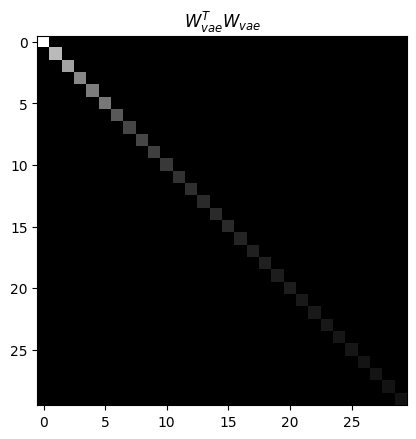

In [17]:
import matplotlib.pyplot as plt
plt.imshow(vae_Gram[0:30, 0:30] / np.max(vae_Gram), cmap='gray', vmin=0)
plt.title(r'$W_{vae}^T W_{vae}$')
plt.savefig('Gram_vae.jpg', dpi=500)
plt.show()

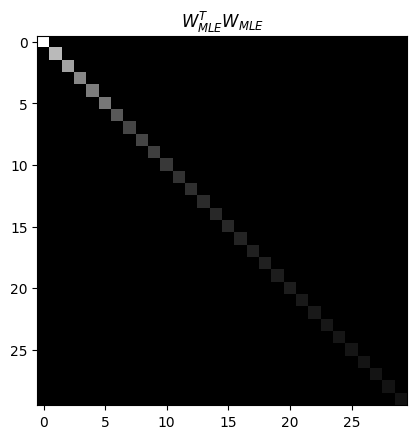

In [18]:
mle_Gram = mle_W.T @ mle_W
plt.imshow(mle_Gram[:30, :30], cmap='gray', vmin=0)
plt.title(r'$W_{MLE}^T W_{MLE}$')
plt.savefig('Gram_mle.jpg', dpi=500)
plt.show()